렉걸려서 파일 나눔

In [ ]:
# 코랩 한글 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
# 전처리 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 내부에 결과를 출력하도록 설정
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

# 분석에 문제가 없는 경고 메시지 숨김
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
os.chdir('/content/drive/Shareddrives/강서구/220311 EDA/행정구 단위/')
df_lpd_2202 = pd.read_csv('LOCAL_PEOPLE_DONG_202202.csv')

# 한글 columns명이 너무 길어서 영어명(생활인구_스키마_공개 파일 기준)으로 간소화
df_lpd_kor = df_lpd_2202.columns
df_lpd_2202.reset_index(inplace=True)
df_lpd_2202 = df_lpd_2202.drop(['여자70세이상생활인구수'], axis=1) # 한칸씩 밀리는 오류 해결
df_lpd_2202.columns = ['YMD','TT','H_DNG_CD','SPOP',
                       'M00','M10','M15','M20','M25','M30','M35','M40','M45','M50','M55','M60','M65','M70',
                       'F00','F10','F15','F20','F25','F30','F35','F40','F45','F50','F55','F60','F65','F70']

# 강서구의 행정코드는 11500510~11500641
gs_lpd_2202 = df_lpd_2202[(df_lpd_2202['H_DNG_CD'] >= 11500510) & (df_lpd_2202['H_DNG_CD'] <= 11500641)]
gs_lpd_2202 = gs_lpd_2202.reset_index(drop=True)

# 행정동
gs_lg = ['염창동','등촌1동', '등촌2동', '등촌3동', '화곡1동', '화곡2동', '화곡3동', '화곡4동', '화곡본동', '화곡6동', '화곡8동',
         '가양1동', '가양2동', '가양3동', '발산1동', '우장산동', '공항동','방화1동','방화2동','방화3동']
gs_cd = [11500510,11500520,11500530,11500535,11500540,11500550,11500560,11500570,11500590,11500591,
         11500593,11500603,11500604,11500605,11500611,11500615,11500620,11500630,11500640,11500641]
gs_dict =  {gs_cd[i] : gs_lg[i] for i in range(len(gs_lg))}

In [ ]:
# 행정동과 날짜에 따른 2월 생활인구 구하기
gs_lpd_2202_dh = gs_lpd_2202.groupby(['YMD', 'H_DNG_CD']).sum() 
gs_lpd_2202_dh.drop(['TT'], axis=1, inplace=True) # SPOP 값이 전체합계와 일치하지 않을 수 있음에 주의
gs_lpd_2202_dh.reset_index(inplace=True)
gs_lpd_2202_dh['H_DNG_CD'] = gs_lpd_2202_dh['H_DNG_CD'].apply(lambda x : gs_dict.get(x) if x else x)

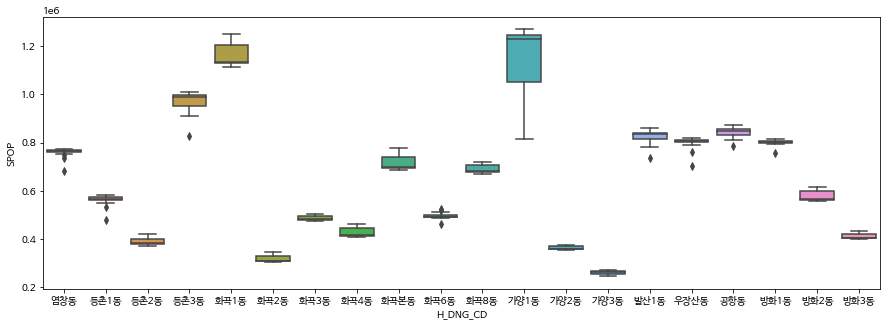

In [ ]:
plt.figure(figsize=(15,5), facecolor="white")
sns.boxplot(data=gs_lpd_2202_dh, x='H_DNG_CD', y='SPOP')

In [ ]:
# 2022년 2월 행정동별 생활인구 그래프 생성
# 남성
plt.figure(figsize=(60, 30), facecolor="white")
for i in range(0, 14):
    ax = plt.subplot(3,5,i+1)
    sns.lineplot(data=gs_lpd_2202_dh, x='YMD', y=gs_lpd_2202_dh.columns[i+2], hue="H_DNG_CD", palette="husl")
    plt.title('행정동별 2월 '+df_lpd_kor[4+i]+' 그래프', fontsize=20)
    plt.xlabel('날짜(연월일)')
    plt.ylabel('생활인구수(명)')
    ax.get_legend().remove()
plt.legend(loc = 2, bbox_to_anchor = (1,1), fontsize=12)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 2022년 2월 행정동별 생활인구 그래프 생성
# 여성
plt.figure(figsize=(60,30), facecolor="white")
for i in range(0, 14):
    ax = plt.subplot(3,5,i+1)
    sns.lineplot(data=gs_lpd_2202_dh, x='YMD', y=gs_lpd_2202_dh.columns[i+16], hue="H_DNG_CD", palette="husl")
    plt.title('행정동별 2월 '+df_lpd_kor[18+i]+' 그래프', fontsize=20)
    plt.xlabel('날짜(연월일)')
    plt.ylabel('생활인구수(명)')
    ax.get_legend().remove()
plt.legend(loc = 2, bbox_to_anchor = (1,1), fontsize=12)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 2. 지도 시각화

In [ ]:
import json
import folium
os.chdir('/content/drive/Shareddrives/강서구/220311 EDA/')
geo_path = 'gangseo.json'
gangseo_geo = json.load(open(geo_path, encoding='utf-8'))

In [3]:
# 2022년 2월 평균 생활인구수

gs_lpd_2202_th = gs_lpd_2202.groupby(['TT', 'H_DNG_CD']).mean() 
gs_lpd_2202_th.drop(['YMD'], axis=1, inplace=True) # SPOP 값이 전체합계와 일치하지 않을 수 있음에 주의
gs_lpd_2202_th.reset_index(inplace=True)
gs_lpd_2202_th['H_DNG'] = gs_lpd_2202_th['H_DNG_CD'].apply(lambda x : gs_dict.get(x) if x else x)

In [ ]:
# H_SDNG_CD = [1116051,1116052,1116053,1116054,1116055,1116057,1116058,1116059,1116061,1116063,1116064,1116065,1116066,1116067,1116069,1116070,1116071,1116072,1116073,1116074]
# H_DNG_CD = [11500510,11500520,11500530,11500535,11500590,11500550,11500560,11500570,11500591,11500593,11500603,11500604,11500605,11500611,11500620,11500630,11500640,11500641,11500540,11500615]
# cd_dict =  {H_DNG_CD[i] : H_SDNG_CD[i] for i in range(len(H_DNG_CD))}

In [4]:
gs_lpd_2202_th

,TT,H_DNG_CD,SPOP,M00,M10,M15,M20,M25,M30,M35,...,F30,F35,F40,F45,F50,F55,F60,F65,F70,H_DNG
0,0,11500510,33890.743218,1597.531868,826.781507,843.875350,620.065479,1094.766157,1489.756625,1755.922036,...,1825.588471,1930.776225,1733.083464,1469.616086,1056.993139,1101.000550,1029.510264,679.422229,1612.661682,염창동
1,0,11500520,23834.516364,710.003357,337.444382,449.694546,604.336950,1129.423475,1410.683821,1527.029118,...,1793.106493,1400.387568,868.410068,861.250814,644.396514,752.865564,654.525936,459.039107,1225.860229,등촌1동
2,0,11500530,19415.927546,652.638632,335.621046,577.536518,484.670989,695.765621,887.955839,923.061925,...,878.770521,1001.990954,723.718818,798.956471,733.256050,864.696629,768.772907,545.715821,1274.383332,등촌2동
3,0,11500535,36128.991971,910.952000,539.079064,856.963986,877.876093,1237.191157,1502.030914,1516.560361,...,1672.743389,1550.202893,1346.625679,1385.379832,1146.121768,1389.819043,1264.528621,1082.109171,3206.858671,등촌3동
4,0,11500540,52713.000307,1492.710268,534.051121,852.698454,1380.780236,2777.737339,2959.318836,2771.174493,...,2927.586711,2547.610643,1974.973275,1950.016446,1715.757771,2032.309943,1893.746196,1559.626732,3510.403307,화곡1동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,23,11500615,33271.750836,1855.374361,1081.914036,1072.032075,778.483507,1074.906229,1003.380704,1349.451682,...,1121.805000,1354.543136,1572.543150,1615.013261,1053.704468,1104.633421,972.490368,872.132268,1846.488796,우장산동
476,23,11500620,31975.788864,2170.620811,632.025164,658.201232,782.395193,1186.017496,1383.360364,1667.145382,...,1284.488100,1510.817486,1245.768979,1237.183971,897.798304,1027.830868,856.320000,748.814593,1805.951232,공항동
477,23,11500630,36302.603486,2164.743271,867.643039,925.402689,756.205086,1072.636654,1215.283639,1771.616993,...,1343.401721,1933.203357,1537.549621,1465.009675,1121.017164,1490.937932,1212.417832,962.879596,1972.201971,방화1동
478,23,11500640,22274.394464,630.310529,316.359007,437.550914,570.687464,852.576518,1032.780786,1167.202214,...,1002.543364,872.584696,644.666339,839.839825,716.910896,860.900161,813.416407,692.605689,1822.255968,방화2동


### 시간, 연령대 별로 변수 생성

In [5]:
# 남성
for i in range(0, 24): # hour (00~24)
    for j in range(0, 14): # age
	    globals()['{0}H{1}'.format(gs_lpd_2202_th.columns[3+j], i)] = gs_lpd_2202_th[gs_lpd_2202_th['TT']==i][['H_DNG',gs_lpd_2202_th.columns[3+j]]].reset_index(drop=True)

# 여성
for i in range(0, 24): # hour (00~24)
    for j in range(0, 14): # age
	    globals()['{0}H{1}'.format(gs_lpd_2202_th.columns[17+j], i)] = gs_lpd_2202_th[gs_lpd_2202_th['TT']==i][['H_DNG',gs_lpd_2202_th.columns[17+j]]].reset_index(drop=True)

In [ ]:
subway_dic = {"방화":[37.577446,126.812741],
   "개화산":[37.572399,126.806171],
   "송정":[37.561184,126.811973],
   "마곡":[37.560183,126.825448],
   "발산":[37.558598,126.837668],
   "우장산":[37.548768,126.836318],
   "화곡":[37.541513,126.840461],
   "까치산":[37.531768,126.846683],
   "김포공항":[37.562434,126.801058],
   "공항시장":[37.563726,126.810678],
   "신방화":[37.567532,126.816601],
   "마곡나루":[37.567336,126.829497],
   "양천향교":[37.568381,126.841333],
   "가양":[37.561391,126.854456],
   "증미":[37.557402,126.861939],
   "등촌":[37.550632,126.865689],
   "염창":[37.546936,126.874916],
   "신목동":[37.544277,126.88308],
   "개화":[37.578608,126.798153]}

In [ ]:
bus = pd.read_csv('서울시버스정류소좌표데이터(2021.01.14.).csv', encoding='cp949')
bus = bus[(bus['Y좌표']>37.524837)&(bus['X좌표']<126.890436)].reset_index(drop=True)

In [6]:
globals()['{0}H{1}'.format(gs_lpd_2202_th.columns[10], 13)]

,H_DNG,M40
0,염창동,1261.898211
1,등촌1동,1012.642750
2,등촌2동,461.203343
3,등촌3동,1923.740404
4,화곡1동,1686.271664
5,화곡2동,461.678529
6,화곡3동,595.995818
7,화곡4동,568.998971
8,화곡본동,923.237371
9,화곡6동,760.377600


In [ ]:
# 지도 예시
m = folium.Map(location=[37.577446,126.812741], zoom_start=13)
f = folium.Choropleth(geo_data=gangseo_geo,
                    data=globals()['{0}H{1}'.format(gs_lpd_2202_th.columns[10], 13)], 
                    columns = globals()['{0}H{1}'.format(gs_lpd_2202_th.columns[10], 13)].columns,
                    key_on='feature.properties.name',
                    fill_color='YlOrRd',
                    fill_opacity=0.7,
                    line_opacity=0.3,
                    legend_name="생활 인구(명)",
                    highlight=True).add_to(m)
folium.LayerControl().add_to(m)
f.geojson.zoom_n_click = False
f.geojson.add_child(folium.features.GeoJsonTooltip(['name'], labels=False))

for i in range(len(bus)):
    folium.Circle([bus['Y좌표'][i],bus['X좌표'][i]],
                  radius=2, # 원 크기
                  color='darkturquoise', # 원 선 색상
                  fill=True,
                  popup=bus['정류소명'][i],
                  tooltip=bus['정류소명'][i]).add_to(m)
for i in subway_dic:
    folium.Circle(subway_dic[i],
                  radius=3, # 원 크기
                  color='mediumvioletred', # 원 선 색상
                  fill=True,
                  popup=i+'역',
                  tooltip=i+'역').add_to(m)

m

### 지도저장

In [ ]:
# 남성
for i in range(0, 24): # hour (00~24)
    for j in range(0, 14): # age
        m = folium.Map(location=[37.559706, 126.843235], zoom_start=13)
        f = folium.Choropleth(geo_data=gangseo_geo,
                            data=globals()['{0}H{1}'.format(gs_lpd_2202_th.columns[3+j], i)], 
                            columns = globals()['{0}H{1}'.format(gs_lpd_2202_th.columns[3+j], i)].columns,
                            key_on='feature.properties.name',
                            fill_color='YlOrRd',
                            fill_opacity=0.7,
                            line_opacity=0.3,
                            legend_name="생활 인구(명)",
                            highlight=True).add_to(m)
        folium.LayerControl().add_to(m)
        f.geojson.zoom_n_click = False
        f.geojson.add_child(folium.features.GeoJsonTooltip(['name'], labels=False))
        m.save('map_2202/'+'2202'+str(gs_lpd_2202_th.columns[3+j])+'H'+str(i)+'.html')

In [ ]:
# 여성
for i in range(0, 24): # hour (00~24)
    for j in range(0, 14): # age
        m = folium.Map(location=[37.559706, 126.843235], zoom_start=13)
        f = folium.Choropleth(geo_data=gangseo_geo,
                            data=globals()['{0}H{1}'.format(gs_lpd_2202_th.columns[17+j], i)], 
                            columns = globals()['{0}H{1}'.format(gs_lpd_2202_th.columns[17+j], i)].columns,
                            key_on='feature.properties.name',
                            fill_color='YlOrRd',
                            fill_opacity=0.7,
                            line_opacity=0.3,
                            legend_name="생활 인구(명)",
                            highlight=True).add_to(m)
        folium.LayerControl().add_to(m)
        f.geojson.zoom_n_click = False
        f.geojson.add_child(folium.features.GeoJsonTooltip(['name'], labels=False))
        m.save('map_2202/'+'2202'+str(gs_lpd_2202_th.columns[17+j])+'H'+str(i)+'.html')

## 저번달과 비교

In [ ]:
# 데이터 불러오기
os.chdir('/content/drive/Shareddrives/강서구/220311 EDA/행정구 단위/')
df_lpd_2202 = pd.read_csv('LOCAL_PEOPLE_DONG_202202.csv')